In [79]:
import numpy as np
import pandas as pd
import pickle5 as pickle


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


In [82]:
dataset_path = 'dataset.csv'
df = pd.read_csv(dataset_path, sep=';')

/tmp/ipykernel_236917/1219635594.py:2: DtypeWarning: Columns (46,56,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path, sep=';')


### Basic information of the Dataset

In [83]:
print("Number of rows", df.shape[0], "filas.")
print("Number of features", df.shape[1])
num_rows_with_nan = df.isna().any(axis=1).sum()
print("Number of NaN rows:", num_rows_with_nan)


Number of rows 100000 filas.
Number of features 100
Number of NaN rows: 73295


### Transformation of the Dataset

In [84]:
df = df.apply(lambda x: x.str.replace(',', '.', regex=False) if x.dtype == 'object' else x)
df = df.apply(pd.to_numeric, errors='ignore')
df=df.drop(columns=['Customer_ID'])


In [85]:

for columna in df.columns:
    if df[columna].dtype == 'object':  # Verificar si la columna contiene valores de tipo string
        valores_unicos = df[columna].unique()
        print(f"Categorical value '{columna}': {valores_unicos}")
     

Categorical value 'new_cell': ['U' 'N' 'Y']
Categorical value 'crclscod': ['A' 'EA' 'C' 'B' 'BA' 'D' 'G' 'CA' 'I' 'AA' 'J' 'U' 'Z' 'K' 'E' 'E4' 'W'
 'DA' 'Y' 'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'B2' 'IF' 'Z1' 'O' 'M' 'L'
 'U1' 'Z4' 'A2' 'V' 'TP' 'EM' 'C2' 'C5' 'S' 'EC' 'Z5' 'D2' 'GY' 'ZY' 'E2'
 'A3' 'V1' 'EF' 'Z2' 'CY' 'P1' 'ZF']
Categorical value 'asl_flag': ['N' 'Y']
Categorical value 'prizm_social_one': ['S' 'U' 'T' 'C' nan 'R']
Categorical value 'area': ['NORTHWEST/ROCKY MOUNTAIN AREA' 'CHICAGO AREA' 'GREAT LAKES AREA'
 'NEW ENGLAND AREA' 'DALLAS AREA' 'CENTRAL/SOUTH TEXAS AREA'
 'TENNESSEE AREA' 'MIDWEST AREA' 'PHILADELPHIA AREA' 'OHIO AREA'
 'HOUSTON AREA' 'SOUTHWEST AREA' 'NEW YORK CITY AREA'
 'ATLANTIC SOUTH AREA' 'SOUTH FLORIDA AREA' 'CALIFORNIA NORTH AREA'
 'DC/MARYLAND/VIRGINIA AREA' 'NORTH FLORIDA AREA' nan 'LOS ANGELES AREA']
Categorical value 'dualband': ['Y' 'N' 'T' 'U' nan]
Categorical value 'refurb_new': ['N' 'R' nan]
Categorical value 'hnd_webcap': ['WCMB' 'WC' nan 'UNK

In [88]:
for columna in df.columns:
    if df[columna].dtype == 'object':  # If there is an object 
        df[columna] = pd.factorize(df[columna])[0]
        

To analyse missing value imputation using a regression model, you can follow these steps:

1. Identify the columns containing missing values.
2. Split your data into two sets: one containing rows with missing values and the other containing complete rows.
3. Use the complete rows to train a regression model that predicts the missing values based on other features.
4. Utilize the trained model to predict the missing values in the dataset with missing values.


In [89]:
# Identify the columns containing missing values.
columns_with_nan = df.columns[df.isnull().any()].tolist()

# Split the data into two sets: one with complete values and another with missing values.
df_without_missing_values = df.dropna()
df_with_missing_values = df[df.isnull().any(axis=1)]

# Separate features and labels for the dataset with complete values.
X_train = df_without_missing_values.drop(columns=columns_with_nan)
y_train = df_without_missing_values[columns_with_nan]

# Train a linear regression model.
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

# Use the model to predict the missing values in the dataset with missing values.
X_test = df_with_missing_values.drop(columns=columns_with_nan)
predicted_values = model_reg.predict(X_test)

# Assign the predicted values to the original DataFrame.
df.loc[df.isnull().any(axis=1), columns_with_nan] = predicted_values

### Feature Analysis

In [90]:
# Calculate the correlation matrix

correlation_matrix = df.corr()

# Extract the correlations with the churn variable
churn_correlation = correlation_matrix['churn'].drop('churn')

# Sort the correlations by absolute value
churn_correlation_sorted = churn_correlation.abs().sort_values(ascending=False)

# Display the correlations
print("Correlations with churn:")
print(churn_correlation_sorted)

Correlations with churn:
asl_flag         0.069473
mou_cvce_Mean    0.052042
complete_Mean    0.051740
mou_Mean         0.051723
comp_vce_Mean    0.051574
                   ...   
kid11_15         0.001072
recv_sms_Mean    0.000812
truck            0.000752
roam_Mean        0.000271
kid6_10          0.000214
Name: churn, Length: 98, dtype: float64


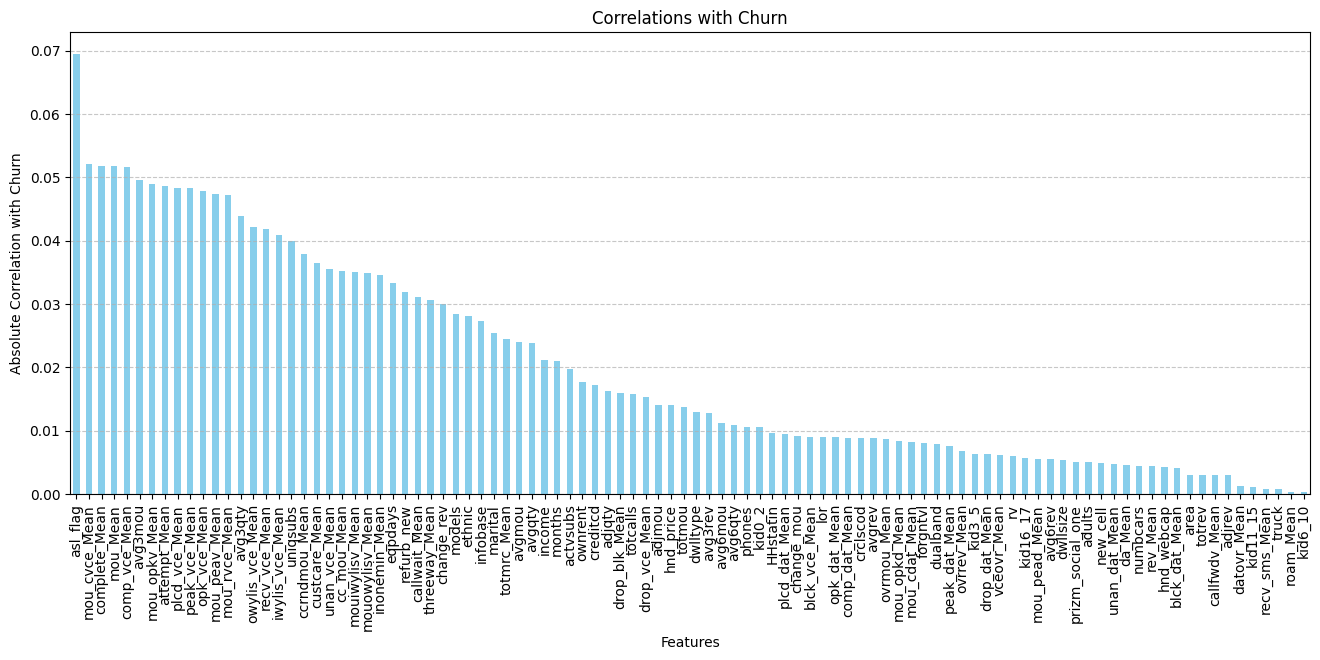

In [91]:
# Plot the bar chart
plt.figure(figsize=(16, 6))
churn_correlation_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Churn')
plt.title('Correlations with Churn')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

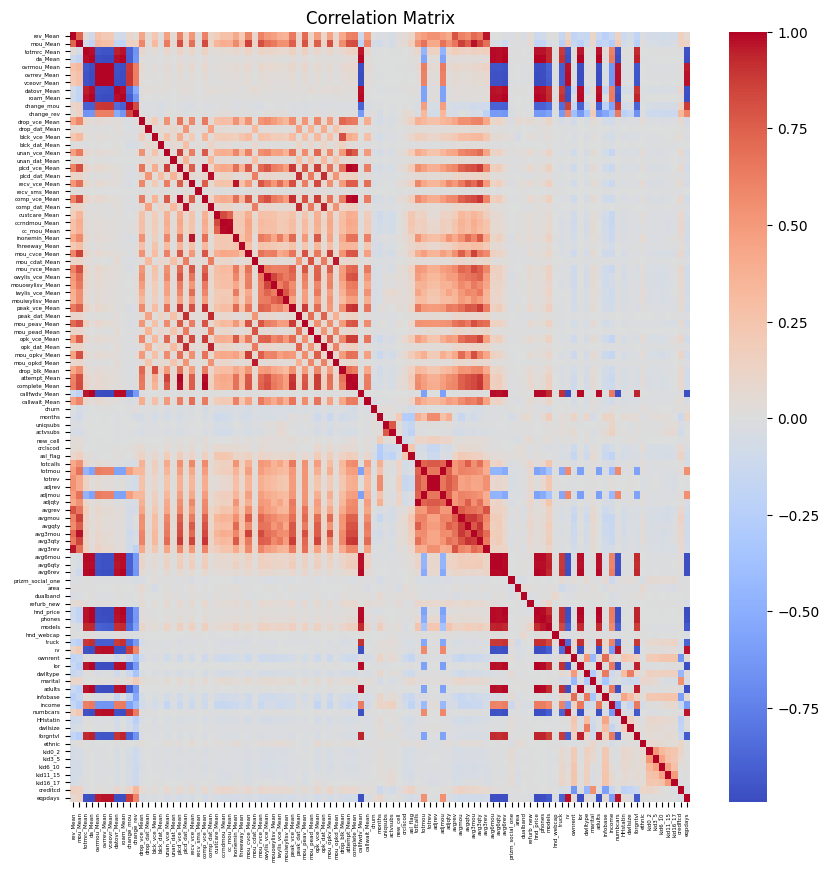

In [92]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10,10))

sns.heatmap(correlation_matrix, annot=None, cmap='coolwarm', fmt=".2f",xticklabels=True, yticklabels=True)

plt.xticks(fontsize=4)
plt.yticks(fontsize=4)

# Add title

plt.title('Correlation Matrix')

# Show the heatmap
plt.show()


In [93]:
corr_target =abs(correlation_matrix['churn'])

features_high_corr = corr_target[corr_target> 0.00800].index.tolist()

features_high_corr.remove('churn')

In [94]:
print(len(features_high_corr))

68


### Train Model (With all features)

In [147]:
X = df.drop(columns=['churn'])  
y = df['churn']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [134]:
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Let's assume you have your data in X_train, X_test, y_train, and y_test

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [300],
    'max_depth': [7, 8],
    'learning_rate': [0.05, 0.1, 0.5],
}

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()
    
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy')

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model:", accuracy)

KeyboardInterrupt: 

In [149]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define the XGBoost classifier with specified hyperparameters
model = XGBClassifier(learning_rate=0.5, n_estimators=400, max_depth=7, objective='binary:logistic',
                    silent=False, nthread=2)

# Define the k-fold cross-validation splitter
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

# Display the results of each cross-validation iteration
for i, resultado in enumerate(results):
    print(f"Iteration {i+1}: {results}")

# Calculate and display the average of the results
print("Average accuracy:", np.mean(results))


/home/carlos/.local/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [20:13:23] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/carlos/.local/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [20:13:31] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/carlos/.local/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [20:13:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/carlos/.local/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [20:13:47] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/carlos/.local/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [20:13:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are n

Iteration 1: [0.85371429 0.856      0.85092857 0.85607143 0.85421429]
Iteration 2: [0.85371429 0.856      0.85092857 0.85607143 0.85421429]
Iteration 3: [0.85371429 0.856      0.85092857 0.85607143 0.85421429]
Iteration 4: [0.85371429 0.856      0.85092857 0.85607143 0.85421429]
Iteration 5: [0.85371429 0.856      0.85092857 0.85607143 0.85421429]
Average accuracy: 0.8541857142857143


In [150]:
model.fit(X_train, y_train)

/home/carlos/.local/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [20:14:09] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None, nthread=2,
              num_parallel_tree=None, ...)

In [151]:
predictions = model.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Printing the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8564
Precision: 0.8638318203535594
Recall: 0.8454806600307302
F1 Score: 0.8545577312626603
Confusion Matrix:
 [[13036  1995]
 [ 2313 12656]]
ROC AUC Score: 0.856377479905592


### Train with the most important features based on ordinary correlation study

In [152]:
len(features_high_corr)

68

In [153]:
X = df.drop(columns=['churn'])  
y = df['churn']  
X_train, X_test, y_train, y_test = train_test_split(X[features_high_corr], y, test_size=0.3, random_state=42)


In [154]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold, cross_val_score


model_cor = XGBClassifier(learning_rate=0.5, n_estimators=400, max_depth=7,objective='binary:logistic',
                    silent=False, nthread=2)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(model_cor, X_train, y_train, cv=kfold, scoring='accuracy')

for i, resultado in enumerate(results):
    print(f"Iteración {i+1}: {results}")

print("Promedio de precisión:", np.mean(results))

/home/carlos/.local/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [20:14:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/carlos/.local/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [20:14:44] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/carlos/.local/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [20:14:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/carlos/.local/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [20:14:55] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/carlos/.local/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [20:15:02] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are n

Iteración 1: [0.83       0.838      0.831      0.83364286 0.84121429]
Iteración 2: [0.83       0.838      0.831      0.83364286 0.84121429]
Iteración 3: [0.83       0.838      0.831      0.83364286 0.84121429]
Iteración 4: [0.83       0.838      0.831      0.83364286 0.84121429]
Iteración 5: [0.83       0.838      0.831      0.83364286 0.84121429]
Promedio de precisión: 0.8347714285714286


In [155]:
model_cor.fit(X_train, y_train)

/home/carlos/.local/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [20:15:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None, nthread=2,
              num_parallel_tree=None, ...)

In [157]:
predictions = model_cor.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Printing the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8395
Precision: 0.8471690371991247
Recall: 0.8276437971808404
F1 Score: 0.8372926029804345
Confusion Matrix:
 [[12796  2235]
 [ 2580 12389]]
ROC AUC Score: 0.8394755477155615


### feature importance

In [158]:
# Obtener la importancia de las características
importances = model_cor.feature_importances_

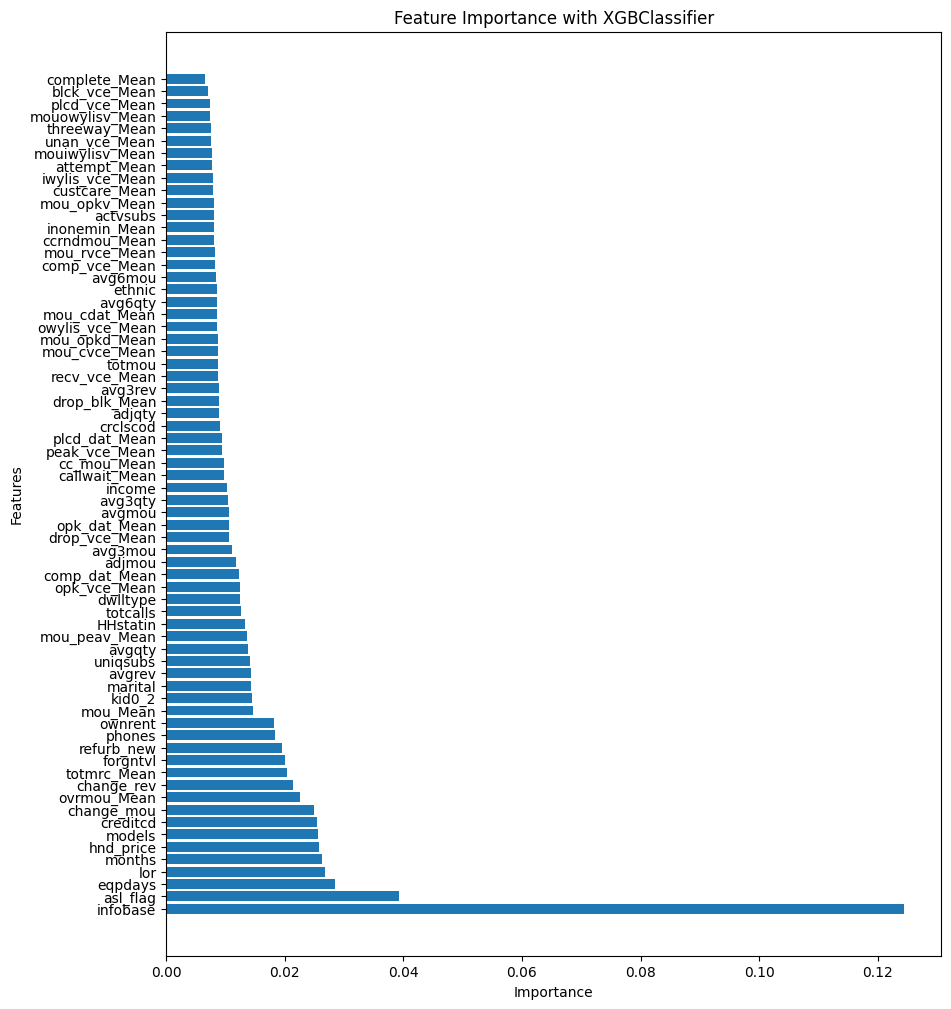

In [159]:
# Sort the indices in descending order based on feature importances
indices_ordered = np.argsort(importances)[::-1]  
ordered_importances = [importances[i] for i in indices_ordered]
ordered_features = [features_high_corr[i] for i in indices_ordered]

plt.figure(figsize=(10, 12))
# Create the bar plot
plt.barh(range(len(ordered_importances)), ordered_importances, tick_label=ordered_features)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance with XGBClassifier')
plt.show()

In [160]:

importances = model_cor.feature_importances_
feature_names = X_train.columns.to_list() 
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [161]:
threshold = 0.010 # Por ejemplo, puedes elegir un umbral del 10%

selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()
print(selected_features)

['infobase', 'asl_flag', 'eqpdays', 'lor', 'months', 'hnd_price', 'models', 'creditcd', 'change_mou', 'ovrmou_Mean', 'change_rev', 'totmrc_Mean', 'forgntvl', 'refurb_new', 'phones', 'ownrent', 'mou_Mean', 'kid0_2', 'marital', 'avgrev', 'uniqsubs', 'avgqty', 'mou_peav_Mean', 'HHstatin', 'totcalls', 'dwlltype', 'opk_vce_Mean', 'comp_dat_Mean', 'adjmou', 'avg3mou', 'drop_vce_Mean', 'opk_dat_Mean', 'avgmou', 'avg3qty', 'income']


In [162]:
# Separar las características de la variable objetivo
X = df.drop(columns=['churn'])  # características
y = df['churn']  # variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.3, random_state=42)

In [163]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold, cross_val_score


model_cor_sel_fea = XGBClassifier(learning_rate=0.5, n_estimators=400, max_depth=7,objective='binary:logistic',
                    silent=False, nthread=2)


kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Realiza la validación cruzada
resultados = cross_val_score(model_cor_sel_fea, X_train, y_train, cv=kfold, scoring='accuracy')

# Muestra los resultados de cada iteración de validación cruzada
for i, resultado in enumerate(resultados):
    print(f"Iteración {i+1}: {resultado}")

# Calcula y muestra el promedio de los resultados
print("Promedio de precisión:", np.mean(resultados))

/home/carlos/.local/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [20:16:19] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/carlos/.local/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [20:16:22] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/carlos/.local/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [20:16:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/carlos/.local/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [20:16:29] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/home/carlos/.local/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [20:16:32] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are n

Iteración 1: 0.8229285714285715
Iteración 2: 0.8298571428571428
Iteración 3: 0.8244285714285714
Iteración 4: 0.8295714285714286
Iteración 5: 0.8265
Promedio de precisión: 0.8266571428571428


In [165]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


model_cor_sel_fea = XGBClassifier(learning_rate=0.5, n_estimators=400, max_depth=7,objective='binary:logistic',
                    silent=False, nthread=2)
model_cor_sel_fea.fit(X_train, y_train)
y_pred = model_cor_sel_fea.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

/home/carlos/.local/lib/python3.8/site-packages/xgboost/core.py:160: UserWarning: [20:17:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.8291666666666667


In [166]:
predictions = model_cor_sel_fea.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Printing the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8291666666666667
Precision: 0.8345113497349463
Recall: 0.8202952769056049
F1 Score: 0.8273422497725971
Confusion Matrix:
 [[12596  2435]
 [ 2690 12279]]
ROC AUC Score: 0.8291483702737059


In [167]:
df.shape

(100000, 99)

In [168]:
X_train.shape

(70000, 35)

In [129]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Paso 1: Cargar el conjunto de datos
# Supongamos que ya tienes cargado tu conjunto de datos en X_train, X_test, y_train, y_test

# Paso 2: Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 3: Construir y entrenar el modelo de red neuronal
mlp_classifier = MLPClassifier(hidden_layer_sizes=(700,), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)

# Paso 4: Hacer predicciones
y_pred = mlp_classifier.predict(X_test_scaled)

# Paso 5: Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8432666666666667


### Save model in a pickle

In [36]:
# Guardar el modelo en un archivo pickle
with open("modelo_xgb.pkl", "wb") as f:
    pickle.dump(xgb_classifier, f)

In [37]:
# Guardar el modelo en un archivo pickle
with open("modelo_mlp.pkl", "wb") as f:
    pickle.dump(mlp_classifier, f)